<a href="https://colab.research.google.com/github/DhruvPatel1409/medicine-recommendation-sysmtem/blob/main/MCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [90]:
file_path = '/content/modified_medical_data.csv'  # Change to your actual file path
df = pd.read_csv(file_path)

In [91]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Age Group,Gender,Severity,prognosis,Hydrocortisone cream,Atenolol,Orlistat,Supportive care,Balm,Hydrocortisone,Oral contraceptives,Vitamin B12 supplements,Latanoprost,Levocetirizine,NSAIDs,Biotin,Levothyroxine,PrEP,Artificial tears,Cyproheptadine,Lidocaine ointment,Thiamine,Lidocaine,N-acetylcysteine,Loperamide,Speech therapy,Dicyclomine,Beta-blockers,Magnesium supplements,Hepatitis B vaccination,Bilirubin,Nifedipine,Amoxicillin,Topical steroids,Polyethylene glycol,Ibuprofen,Vitamins,Fluoxetine,Metoclopramide,Clindamycin,Metformin,Diazepam,Ceftriaxone,Aspirin,Pseudoephedrine,Iron supplements,Antibiotics,Furosemide,Phenobarbital,Clopidogrel,Mesalamine,Physiotherapy,Antipsychotics,Vitamin C,Acetaminophen,Genetic counseling,Pantoprazole,Cetirizine,Naproxen,Alprazolam,Phenazopyridine,Moisturizers,Compression therapy,Guaifenesin,Paracetamol,Mirtazapine,Antihistamine eye drops,Antifungals,Antihistamines,Mupirocin,Simethicone,Modafinil,Oral Rehydration Salts,Protein Supplements,Albuterol,Eye drops,Kenalog,Coal tar,Laxatives,Parkinson medications,Dextromethorphan,Betahistine,Lozenges,Oxybutynin,Phenylephrine,Salicylic acid,Ondansetron,Corticosteroids,Atropine,Electrolytes,Vitamin B12,Ranitidine,Phentermine,Piracetam,Prednisolone,Nitrofurantoin,Clonazepam,Desmopressin,Multivitamins
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Child,Female,Mild,Fungal infection,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 230 entries, itching to Multivitamins
dtypes: int64(226), object(4)
memory usage: 8.6+ MB


In [93]:
df.shape

(4920, 230)

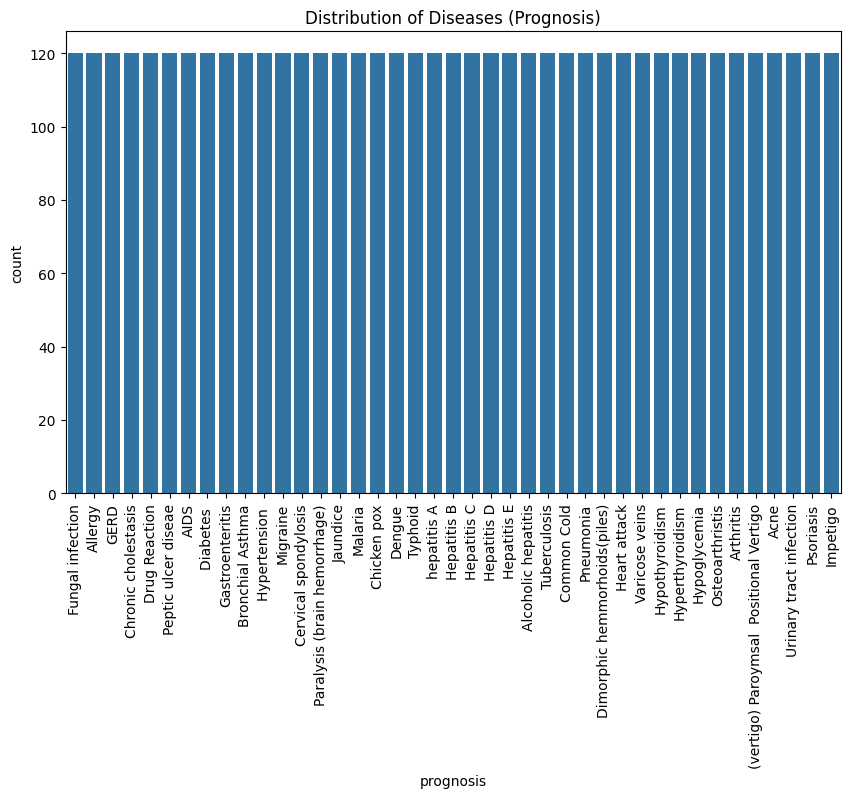

In [94]:
plt.figure(figsize=(10,6))
sns.countplot(x='prognosis', data=df)
plt.title('Distribution of Diseases (Prognosis)')
plt.xticks(rotation=90)
plt.show()

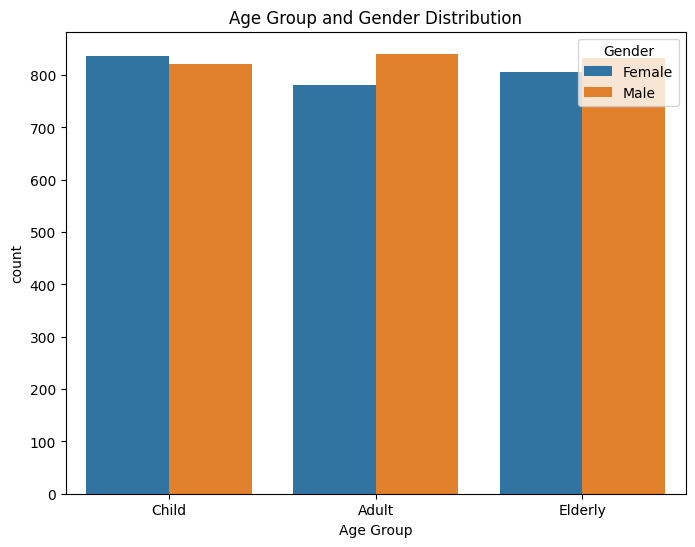

In [95]:
plt.figure(figsize=(8,6))
sns.countplot(x='Age Group', hue='Gender', data=df)
plt.title('Age Group and Gender Distribution')
plt.show()

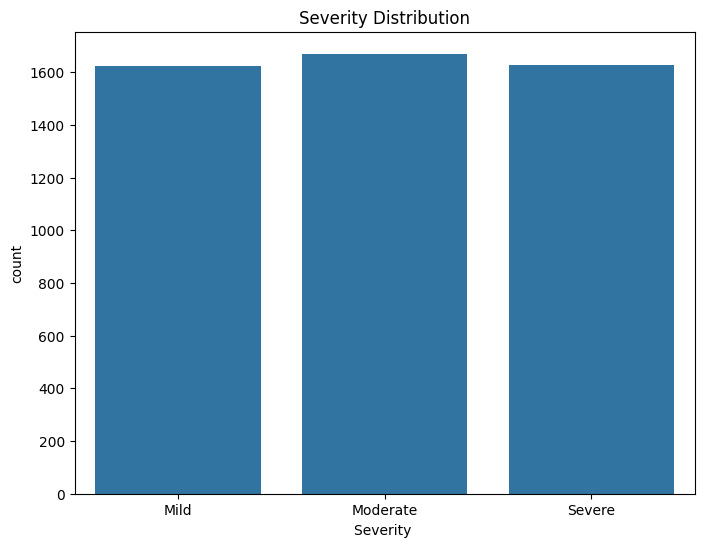

In [96]:
plt.figure(figsize=(8,6))
sns.countplot(x='Severity ', data=df) # Change 'X' to 'x'
plt.title('Severity Distribution')
plt.show()

In [97]:
medicines_columns = ['Hydrocortisone cream', 'Atenolol', 'Orlistat', 'Supportive care', 'Balm', 'Hydrocortisone', 'Oral contraceptives', 'Vitamin B12 supplements', 'Latanoprost', 'Levocetirizine', 'NSAIDs', 'Biotin', 'Levothyroxine', 'PrEP', 'Artificial tears', 'Cyproheptadine', 'Lidocaine ointment', 'Thiamine', 'Lidocaine', 'N-acetylcysteine', 'Loperamide', 'Speech therapy', 'Dicyclomine', 'Beta-blockers', 'Magnesium supplements', 'Hepatitis B vaccination', 'Bilirubin', 'Nifedipine', 'Amoxicillin', 'Topical steroids', 'Polyethylene glycol', 'Ibuprofen', 'Vitamins', 'Fluoxetine', 'Metoclopramide', 'Clindamycin', 'Metformin', 'Diazepam', 'Ceftriaxone', 'Aspirin', 'Pseudoephedrine', 'Iron supplements', 'Antibiotics', 'Furosemide', 'Phenobarbital', 'Clopidogrel', 'Mesalamine', 'Physiotherapy', 'Antipsychotics', 'Vitamin C', 'Acetaminophen', 'Genetic counseling', 'Pantoprazole', 'Cetirizine', 'Naproxen', 'Alprazolam', 'Phenazopyridine', 'Moisturizers', 'Compression therapy', 'Guaifenesin', 'Paracetamol', 'Mirtazapine', 'Antihistamine eye drops', 'Antifungals', 'Antihistamines', 'Mupirocin', 'Simethicone', 'Modafinil', 'Oral Rehydration Salts', 'Protein Supplements', 'Albuterol', 'Eye drops', 'Kenalog', 'Coal tar', 'Laxatives', 'Parkinson medications', 'Dextromethorphan', 'Betahistine', 'Lozenges', 'Oxybutynin', 'Phenylephrine', 'Salicylic acid', 'Ondansetron', 'Corticosteroids', 'Atropine', 'Electrolytes', 'Vitamin B12', 'Ranitidine', 'Phentermine', 'Piracetam', 'Prednisolone', 'Nitrofurantoin', 'Clonazepam', 'Desmopressin', 'Multivitamins']

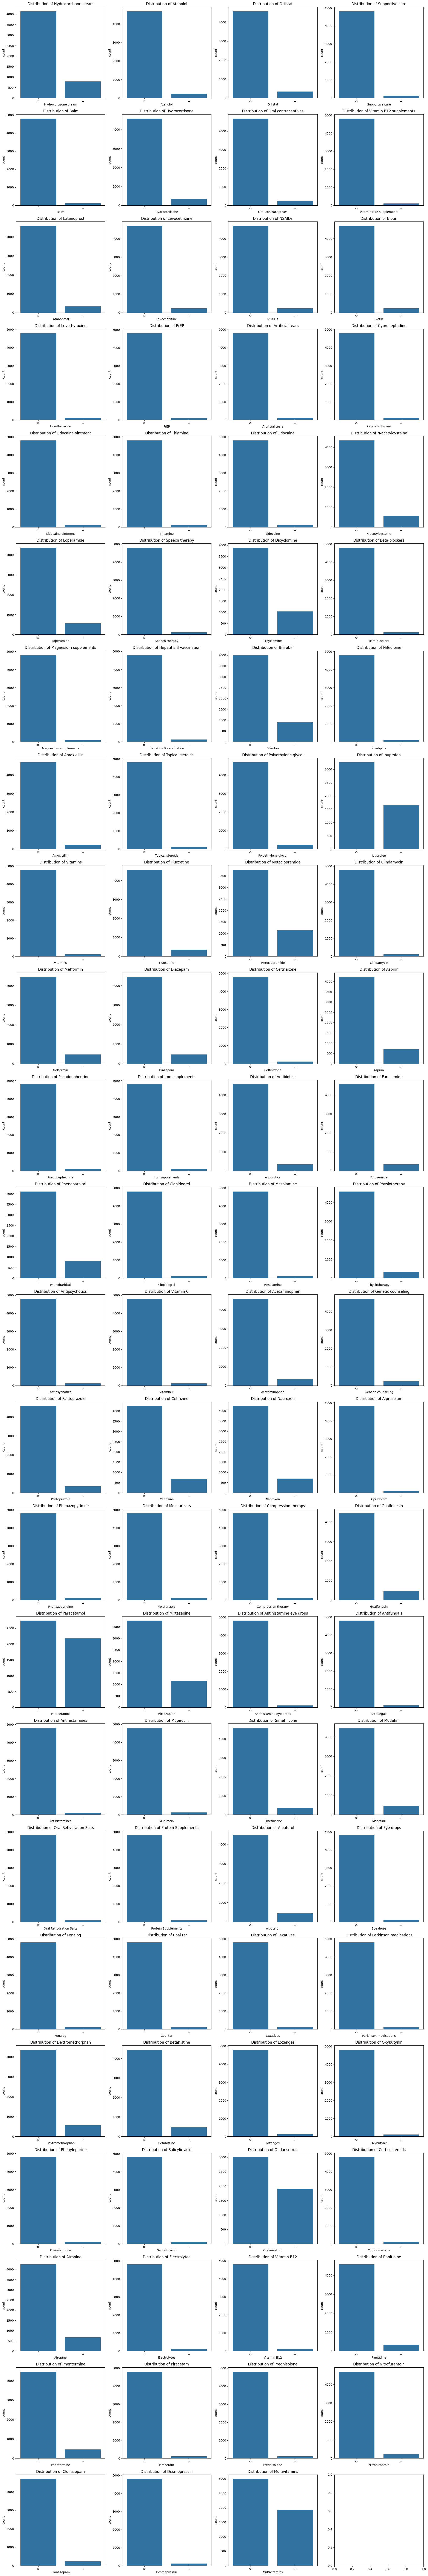

In [98]:
import math

num_medicines = len(medicines_columns)
num_cols = 4  # Number of columns in the subplot grid
num_rows = math.ceil(num_medicines / num_cols)  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))  # Adjust figsize as needed

for i, med in enumerate(medicines_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]  # Handle single row case
    sns.countplot(x=med, data=df, ax=ax)
    ax.set_title(f'Distribution of {med}')
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels if needed

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [99]:
df_encoded = pd.get_dummies(df, columns=['Age Group', 'Gender', 'Severity ', 'prognosis'], prefix_sep='_', drop_first=False)
df_encoded = df_encoded.astype(int)
print(df_encoded)

      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0         

In [100]:
symptomps = ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bowel_movements', 'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus', 'neck_pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 'excessive_hunger', 'extra_marital_contacts', 'drying_and_tingling_lips', 'slurred_speech', 'knee_pain', 'hip_joint_pain', 'muscle_weakness', 'stiff_neck', 'swelling_joints', 'movement_stiffness', 'spinning_movements', 'loss_of_balance', 'unsteadiness', 'weakness_of_one_body_side', 'loss_of_smell', 'bladder_discomfort', 'foul_smell_of urine', 'continuous_feel_of_urine', 'passage_of_gases', 'internal_itching', 'depression', 'irritability', 'muscle_pain', 'altered_sensorium', 'red_spots_over_body', 'belly_pain', 'abnormal_menstruation', 'dischromic _patches', 'watering_from_eyes', 'increased_appetite', 'polyuria', 'family_history', 'mucoid_sputum', 'rusty_sputum', 'lack_of_concentration', 'visual_disturbances', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload.1', 'blood_in_sputum', 'prominent_veins_on_calf', 'palpitations', 'painful_walking', 'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'blister', 'red_sore_around_nose', 'yellow_crust_ooze', 'Age Group_Adult', 'Age Group_Child', 'Age Group_Elderly', 'Gender_Female', 'Gender_Male', 'Severity _Mild', 'Severity _Moderate', 'Severity _Severe']

In [101]:
medicines = ['prognosis_(vertigo) Paroymsal  Positional Vertigo', 'prognosis_AIDS', 'prognosis_Acne', 'prognosis_Alcoholic hepatitis', 'prognosis_Allergy', 'prognosis_Arthritis', 'prognosis_Bronchial Asthma', 'prognosis_Cervical spondylosis', 'prognosis_Chicken pox', 'prognosis_Chronic cholestasis', 'prognosis_Common Cold', 'prognosis_Dengue', 'prognosis_Diabetes ', 'prognosis_Dimorphic hemmorhoids(piles)', 'prognosis_Drug Reaction', 'prognosis_Fungal infection', 'prognosis_GERD', 'prognosis_Gastroenteritis', 'prognosis_Heart attack', 'prognosis_Hepatitis B', 'prognosis_Hepatitis C', 'prognosis_Hepatitis D', 'prognosis_Hepatitis E', 'prognosis_Hypertension ', 'prognosis_Hyperthyroidism', 'prognosis_Hypoglycemia', 'prognosis_Hypothyroidism', 'prognosis_Impetigo', 'prognosis_Jaundice', 'prognosis_Malaria', 'prognosis_Migraine', 'prognosis_Osteoarthristis', 'prognosis_Paralysis (brain hemorrhage)', 'prognosis_Peptic ulcer diseae', 'prognosis_Pneumonia', 'prognosis_Psoriasis', 'prognosis_Tuberculosis', 'prognosis_Typhoid', 'prognosis_Urinary tract infection', 'prognosis_Varicose veins', 'prognosis_hepatitis A','Hydrocortisone cream', 'Atenolol', 'Orlistat', 'Supportive care', 'Balm', 'Hydrocortisone', 'Oral contraceptives', 'Vitamin B12 supplements', 'Latanoprost', 'Levocetirizine', 'NSAIDs', 'Biotin', 'Levothyroxine', 'PrEP', 'Artificial tears', 'Cyproheptadine', 'Lidocaine ointment', 'Thiamine', 'Lidocaine', 'N-acetylcysteine', 'Loperamide', 'Speech therapy', 'Dicyclomine', 'Beta-blockers', 'Magnesium supplements', 'Hepatitis B vaccination', 'Bilirubin', 'Nifedipine', 'Amoxicillin', 'Topical steroids', 'Polyethylene glycol', 'Ibuprofen', 'Vitamins', 'Fluoxetine', 'Metoclopramide', 'Clindamycin', 'Metformin', 'Diazepam', 'Ceftriaxone', 'Aspirin', 'Pseudoephedrine', 'Iron supplements', 'Antibiotics', 'Furosemide', 'Phenobarbital', 'Clopidogrel', 'Mesalamine', 'Physiotherapy', 'Antipsychotics', 'Vitamin C', 'Acetaminophen', 'Genetic counseling', 'Pantoprazole', 'Cetirizine', 'Naproxen', 'Alprazolam', 'Phenazopyridine', 'Moisturizers', 'Compression therapy', 'Guaifenesin', 'Paracetamol', 'Mirtazapine', 'Antihistamine eye drops', 'Antifungals', 'Antihistamines', 'Mupirocin', 'Simethicone', 'Modafinil', 'Oral Rehydration Salts', 'Protein Supplements', 'Albuterol', 'Eye drops', 'Kenalog', 'Coal tar', 'Laxatives', 'Parkinson medications', 'Dextromethorphan', 'Betahistine', 'Lozenges', 'Oxybutynin', 'Phenylephrine', 'Salicylic acid', 'Ondansetron', 'Corticosteroids', 'Atropine', 'Electrolytes', 'Vitamin B12', 'Ranitidine', 'Phentermine', 'Piracetam', 'Prednisolone', 'Nitrofurantoin', 'Clonazepam', 'Desmopressin', 'Multivitamins']

In [102]:
X = df_encoded[symptomps]
Y = df_encoded[medicines]

In [103]:
X.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Age Group_Adult,Age Group_Child,Age Group_Elderly,Gender_Female,Gender_Male,Severity _Mild,Severity _Moderate,Severity _Severe
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0


In [104]:
Y.head()

,prognosis_(vertigo) Paroymsal Positional Vertigo,prognosis_AIDS,prognosis_Acne,prognosis_Alcoholic hepatitis,prognosis_Allergy,prognosis_Arthritis,prognosis_Bronchial Asthma,prognosis_Cervical spondylosis,prognosis_Chicken pox,prognosis_Chronic cholestasis,prognosis_Common Cold,prognosis_Dengue,prognosis_Diabetes,prognosis_Dimorphic hemmorhoids(piles),prognosis_Drug Reaction,prognosis_Fungal infection,prognosis_GERD,prognosis_Gastroenteritis,prognosis_Heart attack,prognosis_Hepatitis B,prognosis_Hepatitis C,prognosis_Hepatitis D,prognosis_Hepatitis E,prognosis_Hypertension,prognosis_Hyperthyroidism,prognosis_Hypoglycemia,prognosis_Hypothyroidism,prognosis_Impetigo,prognosis_Jaundice,prognosis_Malaria,prognosis_Migraine,prognosis_Osteoarthristis,prognosis_Paralysis (brain hemorrhage),prognosis_Peptic ulcer diseae,prognosis_Pneumonia,prognosis_Psoriasis,prognosis_Tuberculosis,prognosis_Typhoid,prognosis_Urinary tract infection,prognosis_Varicose veins,prognosis_hepatitis A,Hydrocortisone cream,Atenolol,Orlistat,Supportive care,Balm,Hydrocortisone,Oral contraceptives,Vitamin B12 supplements,Latanoprost,Levocetirizine,NSAIDs,Biotin,Levothyroxine,PrEP,Artificial tears,Cyproheptadine,Lidocaine ointment,Thiamine,Lidocaine,N-acetylcysteine,Loperamide,Speech therapy,Dicyclomine,Beta-blockers,Magnesium supplements,Hepatitis B vaccination,Bilirubin,Nifedipine,Amoxicillin,Topical steroids,Polyethylene glycol,Ibuprofen,Vitamins,Fluoxetine,Metoclopramide,Clindamycin,Metformin,Diazepam,Ceftriaxone,Aspirin,Pseudoephedrine,Iron supplements,Antibiotics,Furosemide,Phenobarbital,Clopidogrel,Mesalamine,Physiotherapy,Antipsychotics,Vitamin C,Acetaminophen,Genetic counseling,Pantoprazole,Cetirizine,Naproxen,Alprazolam,Phenazopyridine,Moisturizers,Compression therapy,Guaifenesin,Paracetamol,Mirtazapine,Antihistamine eye drops,Antifungals,Antihistamines,Mupirocin,Simethicone,Modafinil,Oral Rehydration Salts,Protein Supplements,Albuterol,Eye drops,Kenalog,Coal tar,Laxatives,Parkinson medications,Dextromethorphan,Betahistine,Lozenges,Oxybutynin,Phenylephrine,Salicylic acid,Ondansetron,Corticosteroids,Atropine,Electrolytes,Vitamin B12,Ranitidine,Phentermine,Piracetam,Prednisolone,Nitrofurantoin,Clonazepam,Desmopressin,Multivitamins
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [106]:
from keras.layers import BatchNormalization, LeakyReLU
from keras.callbacks import ModelCheckpoint

model = Sequential([
    Dense(1024, input_shape=(X_train.shape[1],)),  # Increased units
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),  # Increased dropout to reduce overfitting
    Dense(512),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),
    Dense(256),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),
    Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),
    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dense(len(medicines), activation='sigmoid')
])

In [107]:
model.compile(optimizer=Adam(learning_rate=0.0005),  # Lowered learning rate to fine-tune training
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [108]:
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [109]:
history = model.fit(X_train, Y_train,
                    epochs=200,  # Increased epochs for more training time
                    batch_size=32,  # Increased batch size to stabilize training
                    validation_data=(X_test, Y_test))

Epoch 1/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.0081 - loss: 0.5728 - val_accuracy: 0.0000e+00 - val_loss: 0.3344
Epoch 2/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.2002 - val_accuracy: 0.0000e+00 - val_loss: 0.1775
Epoch 3/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.1692 - val_accuracy: 0.0000e+00 - val_loss: 0.1412
Epoch 4/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.1497 - val_accuracy: 0.0000e+00 - val_loss: 0.1139
Epoch 5/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: 0.1308 - val_accuracy: 0.0000e+00 - val_loss: 0.0943
Epoch 6/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 2.5929e-04 - loss: 0.1150 - val_accuracy: 0.0000e+00 - val_loss: 0.0784
Epoch 7/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 - loss: 0.1020 - val_accuracy: 0.0000e+00 - val_loss: 0.0658
Epoch 8/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [110]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 1024)                │         143,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_15 (LeakyReLU)           │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_16 (LeakyReLU)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_17 (LeakyReLU)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_18 (LeakyReLU)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_19 (LeakyReLU)           │ (None, 64)                  │              

 Total params: 2,557,498 (9.76 MB)

 Trainable params: 851,176 (3.25 MB)

 Non-trainable params: 3,968 (15.50 KB)

 Optimizer params: 1,702,354 (6.49 MB)

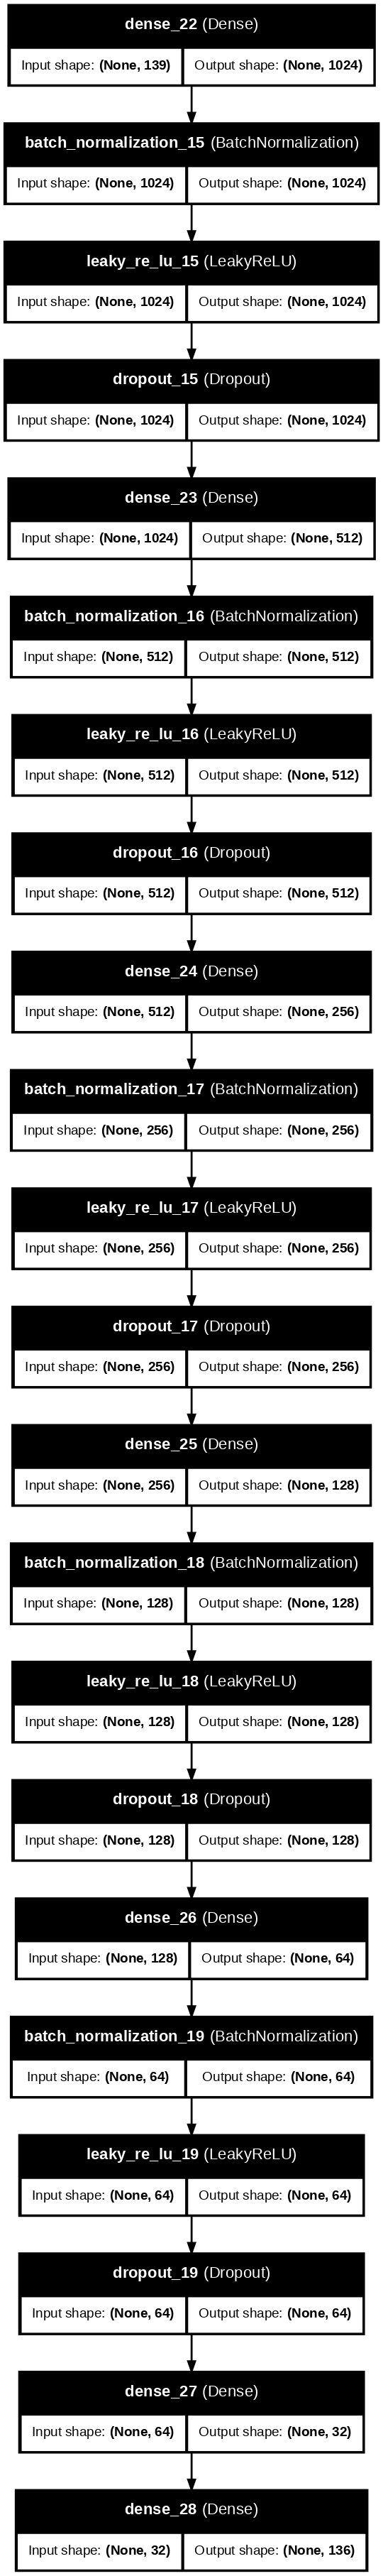

In [111]:
from keras.utils import plot_model
plot_model(model,
           show_shapes=True,
           show_layer_names=True,
           dpi=100)

In [112]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8974 - loss: 0.0081
Test Accuracy: 89.23%


Text(0.5, 0, 'Epoch')

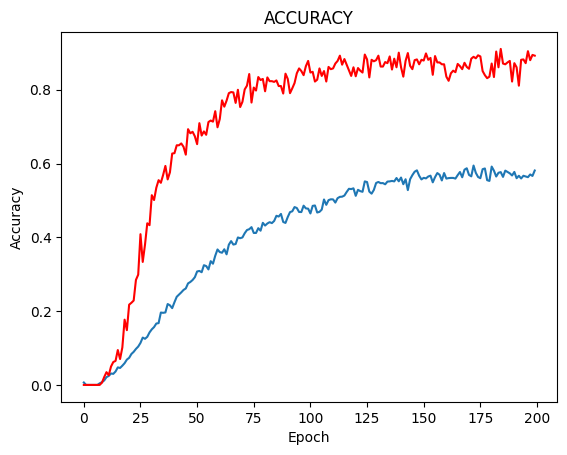

In [113]:
h = history

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'], c='red')
plt.title('ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

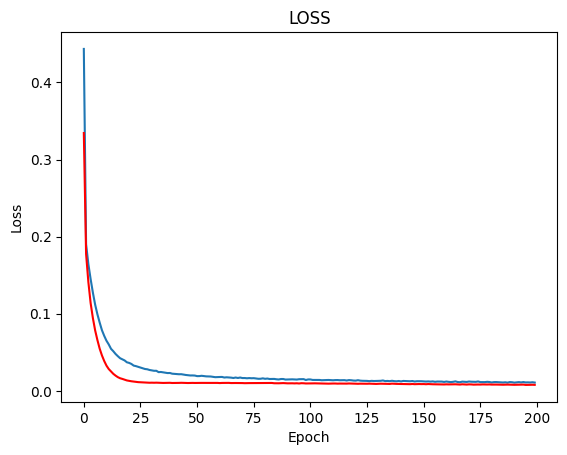

In [114]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'], c='red')
plt.title('LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [115]:
import numpy as np

# Example symptom input (already padded to 139 features as required by the model)
symptom_input = np.array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1]])
num_features_to_add = 139 - symptom_input.shape[1]
symptom_input = np.pad(symptom_input, ((0, 0), (0, num_features_to_add)), 'constant', constant_values=0)

# Make predictions
Y_pred = model.predict(symptom_input)

# Apply a threshold to convert probabilities to binary values (0 or 1)
predicted_labels = (Y_pred > 0.5).astype(int)

# Separate the first prediction as disease
disease_name = "Unknown Disease" if predicted_labels[0][0] == 0 else "Known Disease"  # Replace with actual disease names if available

# Medicines list should start after the disease prediction, assuming 'medicines' has the correct names
medicine_names = medicines[1:]  # Skip the first element, which is disease

# Display predicted medicines based on the thresholded predictions (after the first prediction)
predicted_medicine_labels = [medicine_names[i] for i, pred in enumerate(predicted_labels[0][1:]) if pred]

disease_name = predicted_medicine_labels[0]
recommended_medicines = predicted_medicine_labels[1:]  # Remaining items are medicines

# Display the results
print("Disease:", disease_name)
print("Recommended Medicines:", recommended_medicines)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
Disease: prognosis_Fungal infection
Recommended Medicines: ['Hydrocortisone cream', 'Cetirizine']


In [116]:
# import numpy as np

# # Example symptom input (already padded to 139 features as required by the model)
# symptom_input = np.array([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0]])
# num_features_to_add = 139 - symptom_input.shape[1]
# symptom_input = np.pad(symptom_input, ((0, 0), (0, num_features_to_add)), 'constant', constant_values=0)

# # Make predictions
# Y_pred = model.predict(symptom_input)

# # Apply a threshold to convert probabilities to binary values (0 or 1)
# predicted_medicines = (Y_pred > 0.5).astype(int)

# # Ensure medicine_names is the correct length, matching the model's output
# # This might involve loading the actual medicine names based on your dataset structure
# medicine_names = medicines # Assuming 'medicines' contains the actual list of 136 medicine names

# # Display predicted medicines based on the thresholded predictions
# predicted_medicine_labels = [medicine_names[i] for i, pred in enumerate(predicted_medicines[0]) if pred]
# print("Recommended Medicines:", predicted_medicine_labels)

In [118]:
model.save("med_model.keras")